**Step-1 : import packages**

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**Step-2 : Read the data**

In [4]:
wine_df=pd.read_csv('winequality_red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Step-3 : Data quick checks**

In [10]:
wine_df.shape

(1599, 12)

In [11]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There is no null values in dataset

**Step-4 : Feature Selection**

- Here iam using **PCA**(Principle Component Analysis) 

In [53]:
X=wine_df.drop('quality',axis=1)
y=wine_df['quality']

In [54]:
X.columns,y

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'),
 0       5
 1       5
 2       5
 3       6
 4       5
        ..
 1594    5
 1595    6
 1596    6
 1597    5
 1598    6
 Name: quality, Length: 1599, dtype: int64)

- Multicolliniarity before applying **PCA**

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_df=pd.DataFrame(vif,index=X.columns,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
density,1479.287209
pH,1070.967685
alcohol,124.394866
fixed acidity,74.452265
sulphates,21.590621
volatile acidity,17.060026
citric acid,9.183495
chlorides,6.554877
total sulfur dioxide,6.519699
free sulfur dioxide,6.442682


**PCA**

In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pca.fit(X)

PCA(n_components=9)

In [57]:
pca_data=pca.transform(X)  # Input data
len(pca_data[0]),len(pca_data)

# Original data has 1599 rows
# Original data has 11 columns is converted into 6 columns
# Thats why we each tuple 6 values are there

(9, 1599)

In [58]:
new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [59]:
new_data['quality']=y
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,0.031547,0.147051,0.006047,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325,0.223874,-0.143165,-0.089312,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114,0.136190,-0.058480,-0.084793,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092,-0.218923,0.062244,0.006281,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,0.031547,0.147051,0.006047,5
...,...,...,...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238,-0.020342,-0.039370,0.019054,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335,0.102762,0.015382,0.031433,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513,0.078622,-0.026835,-0.020558,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548,0.094561,0.041732,0.128439,5


In [60]:
pca.explained_variance_ratio_
# 6 pcs has different variances
# first variance has 9.4, which means 94%

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05, 1.93627614e-05, 9.47278079e-06,
       8.41376628e-06])

In [61]:
np.sum(pca.explained_variance_ratio_)
# the sum of 6pcs comonent variance almost covers =100%
# so we can choose 6 components

0.9999987848032558

In [62]:
pca.explained_variance_

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02, 2.31926578e-02, 1.13464685e-02,
       1.00779841e-02])

**Spliting the PCA data**

In [63]:
X=new_data.drop('quality',axis=1)
y=new_data['quality']

- Multicollinearity after **PCA**

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_df=pd.DataFrame(vif,index=X.columns,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
PC3,1.0
PC5,1.0
PC2,1.0
PC7,1.0
PC9,1.0
PC1,1.0
PC4,1.0
PC8,1.0
PC6,1.0


**Data Spliting**

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
pca_data.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1599, 9), (1279, 9), (320, 9), (1279,), (320,))

**Model Development**

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
y_train

493     6
354     6
342     6
834     5
705     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1279, dtype: int64

In [69]:
lr.intercept_

5.628713976669498

In [70]:
lr.coef_

array([-0.00445797,  0.01220297,  0.04991237,  0.03606386,  0.35267761,
       -0.96786593,  0.06119133,  0.36516699, -0.9667171 ])

In [71]:
y_pred=lr.predict(X_test)
y_pred

array([5.39384516, 5.11032432, 5.65665421, 5.47355913, 5.70909525,
       5.29323668, 5.06404506, 5.13047439, 5.64976329, 5.65013201,
       6.1337002 , 5.21135629, 5.5069473 , 5.2238258 , 5.43448702,
       6.47630108, 5.17622327, 5.61336782, 6.48581775, 5.26144549,
       5.43454448, 5.17375203, 5.93804365, 6.36064985, 5.36863942,
       5.38569454, 6.42902844, 5.38767806, 5.1264887 , 6.18953412,
       5.24298017, 5.54352269, 5.73223313, 5.31773786, 5.45672898,
       5.01953585, 6.05796086, 5.62407842, 5.59582245, 6.13618913,
       5.44295596, 5.28144063, 6.10231949, 5.16662949, 5.84676885,
       5.73419413, 6.37279885, 5.5547523 , 5.06848646, 5.53690393,
       5.12409017, 5.49285905, 5.62776399, 6.2897874 , 4.93813745,
       4.9575234 , 5.93996156, 5.33128556, 5.84723939, 5.21656107,
       5.64595652, 5.98332941, 5.24952791, 5.28990482, 6.53660409,
       5.42787929, 6.32127813, 5.2908382 , 6.36819162, 5.32796937,
       6.46566021, 4.68303296, 5.73190464, 5.86157474, 6.16069

**Evalution**

In [72]:
eval_df=pd.DataFrame(X_test)
eval_df['y_actual']=y_test
eval_df['y_prediction']=y_pred
eval_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,y_actual,y_prediction
803,-0.858057,-1.723472,-0.610574,0.007236,-0.858551,0.012901,0.046015,-0.030995,-0.141026,6,5.393845
124,55.304082,-7.169587,-0.706352,-1.256015,-0.260312,0.087084,-0.174698,0.123877,-0.039042,5,5.110324
350,-11.928074,3.763910,2.382249,-0.557982,-0.444382,0.115774,0.379196,0.130526,-0.028927,6,5.656654
682,14.781125,13.185055,0.441788,-0.830528,-0.545901,0.002997,-0.149649,0.008542,0.042195,5,5.473559
1326,-11.697980,4.834328,-1.730781,-0.320357,0.017964,-0.110963,-0.092779,-0.038486,0.027746,6,5.709095
...,...,...,...,...,...,...,...,...,...,...,...
1259,-13.326622,2.146924,-1.474220,0.806642,0.531962,0.157844,0.080361,0.021777,-0.076965,6,5.791943
1295,37.996462,27.510211,-0.432486,1.069417,-1.359564,0.155421,-0.105575,-0.206903,-0.139377,5,5.234824
1155,-9.765278,-4.864207,-0.210421,-0.259763,-0.593325,0.054538,-0.070061,-0.158776,-0.043928,5,5.311180
963,-18.104074,8.278359,0.409949,-0.498507,0.682281,-0.203736,-0.099393,-0.109620,-0.097021,6,6.298419


In [73]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_square=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print('mse:',mse)
print('rmse:',rmse)
print('r2_score:',r_square)

mse: 0.3961414701189549
rmse: 0.6293977042530063
r2_score: 0.3938210890751359


# Checking Fitness of model

Training MSE: 0.4293, R²: 0.3402
Testing MSE: 0.3961, R²: 0.3938
The model is likely **Underfitting** (Both train and test scores are low).


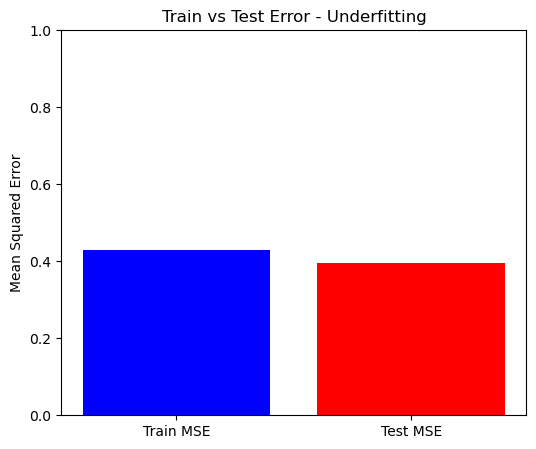

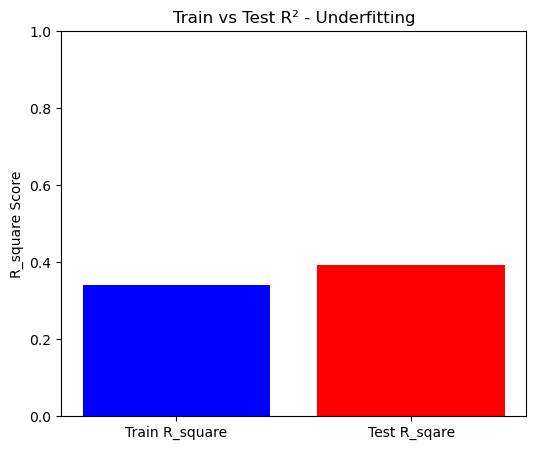

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Define error ratio correctly
error_ratio = test_r2 / train_r2 if train_r2 != 0 else float('inf')

# Model fitting check
if train_r2 < 0 or test_r2 < 0:
    model_status = "Poor Fit (Worse than Baseline)"
    print("Warning: Negative R² scores indicate the model performs worse than a horizontal line.")
elif abs(train_r2 - test_r2) > 0.2 and train_r2 > test_r2:
    model_status = "Overfitting"
    print("The model is likely **Overfitting** (High train score, low test score).")
elif train_r2 < 0.6 and test_r2 < 0.6:
    model_status = "Underfitting"
    print("The model is likely **Underfitting** (Both train and test scores are low).")
elif 0.9 <= error_ratio <= 1.1 and train_r2 >= 0.6 and test_r2 >= 0.6:
    model_status = "Well-Fitted"
    print("The model is **Well-Fitted** (Train and test R² scores are close and reasonably high).")
else:
    model_status = "Needs Improvement"
    print("The model shows slight imbalance; consider tuning hyperparameters.")


# Plot Train vs Test Errors
plt.figure(figsize=(6, 5))
plt.bar(["Train MSE", "Test MSE"], [train_mse, test_mse], color=["blue", "red"])
plt.ylabel("Mean Squared Error")
plt.title(f"Train vs Test Error - {model_status}")
plt.ylim(0,1)
plt.show()

# Plot Train vs Test R² Score
plt.figure(figsize=(6, 5))
plt.bar(["Train R_square", "Test R_sqare"], [train_r2, test_r2], color=["blue", "red"])
plt.ylabel("R_square Score")
plt.title(f"Train vs Test R² - {model_status}")
plt.ylim(0, 1)
plt.show()

# Assumptions based on features (or) input columns

$Linearity$

- There should be linear relationship between "Dependent variable(output column) and independent variables(input columns)"

- it is an important property to maintain linear relationship

- How to check : **scatter plots** are the best to identify the linear relationship

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')


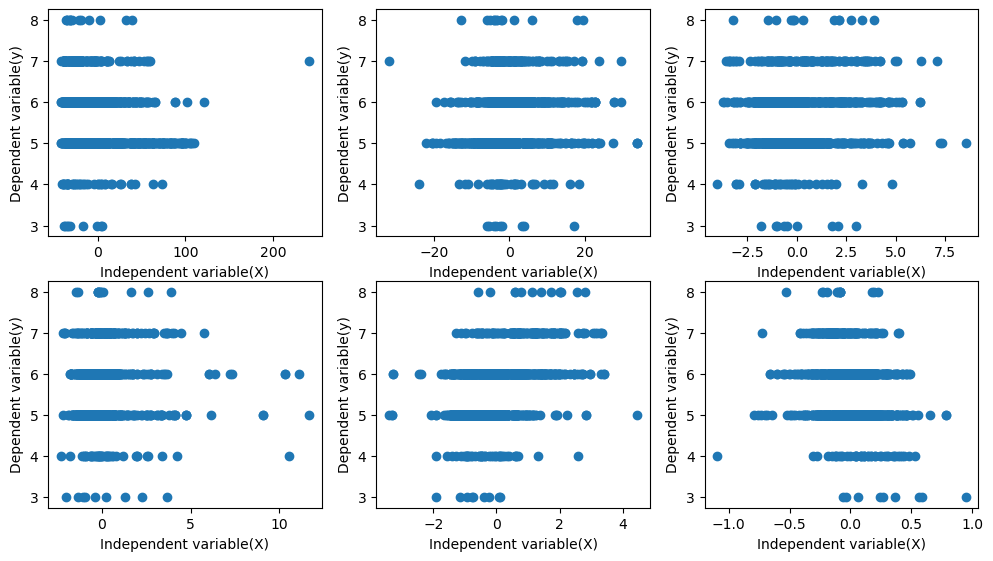

In [78]:
cols=X_train.columns
print(cols)
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.scatter(X_train[cols[i]],y_train)
    plt.xlabel('Independent variable(X)')
    plt.ylabel('Dependent variable(y)')

$Multicollinearity$

- We don't want Multicollinearity

- input variables should be independent eachother

- if input columns having relation then we can say that **multicollinearity** exist

- How to check : Variance inflation factor (VIF)

- **Conclusion: in real time senario if vif>10 we can consider as multicollinearity is there**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_df=pd.DataFrame(vif,index=X_train.columns,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
PC4,1.002601
PC1,1.001801
PC5,1.000622
PC2,1.000498
PC3,1.000353
PC6,1.000176


- There is no multicollinearity

# Assumptions based on errors (or) residuals

**No auto correlation**

- We don't want any relation

- how to check : durbon watson test

- Ranges : 0-4

    - 0-2 : Negative Relation
 
    - 2   : No relation
 
    - 2-4 : Positive Relation
 

In [74]:
from statsmodels.stats.stattools import durbin_watson
preds=lr.predict(X_test)
residual=y_test - preds #(actual-predictions)

dw_statistic = round(durbin_watson(residual))
print(f"Durbin-Watson Statistic: {dw_statistic}")

# Interpretation of Durbin-Watson statistic
if dw_statistic < 2:
    print("There may be positive autocorrelation.")
elif dw_statistic > 2:
    print("There may be negative autocorrelation.")
else:
    print("No significant autocorrelation detected.")

Durbin-Watson Statistic: 2
No significant autocorrelation detected.


$Homoscodasticity$

- How to check : **Residuals V/S Predictions**

<img src="https://www.researchgate.net/profile/Akhmad_Fauzy/publication/319091775/figure/fig2/AS:526826008846336@1502616516067/Example-of-homoscedasticity-Ideally-residuals-are-randomly-scattered-around-0-the.ppm" alt="heteroscedasticity - Does this scatterplot indicate homoscedasticity ..." class=" nofocus" tabindex="0" aria-label="heteroscedasticity - Does this scatterplot indicate homoscedasticity ..." role="button">

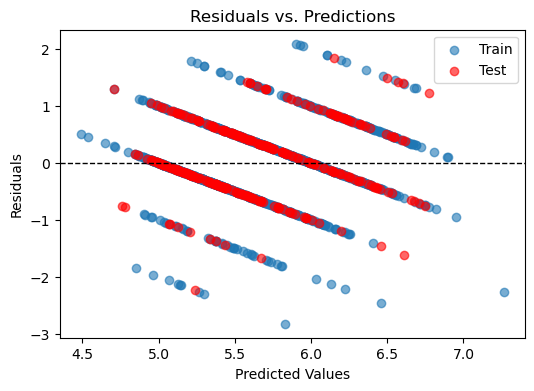

In [69]:
# 1. Make predictions 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 2. Compute residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# 3. Plot Residuals vs Predictions
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, train_residuals, label="Train", alpha=0.6)
plt.scatter(y_test_pred, test_residuals, label="Test", alpha=0.6, color='red')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")
plt.legend()
plt.show()


$Normality$

- how to check : **Q-Q plot**

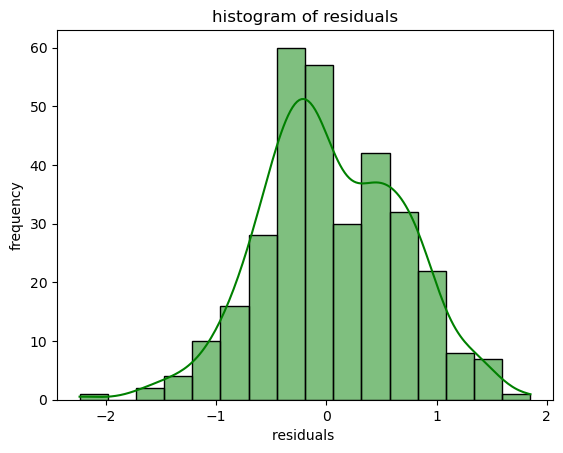

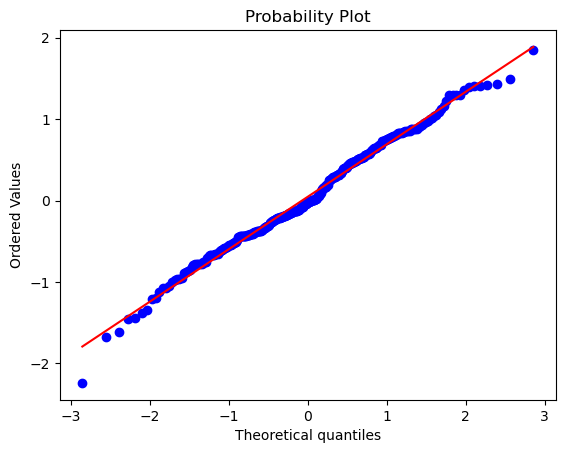

In [72]:
# Histogram of Residuals

# Compute residuals
preds = lr.predict(X_test)
residuals = y_test - preds  # (Actual - Predictions)
sns.histplot(residual,kde=True,color='green')
plt.xlabel('residuals ')
plt.ylabel('frequency')
plt.title('histogram of residuals')
plt.show()

# q-q plot
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()